In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import pandas as pd

with open('train_dataset.pickle', 'rb') as trainFile:
    trainData = pickle.load(trainFile)
with open('test_dataset.pickle', 'rb') as testFile:
    testData = pickle.load(testFile)


# print(testData)
print(len(trainData))
print(len(testData))

800
200


In [26]:
# 2.3.1
xTest, yTest = np.split(testData, 2, axis=1)

np.random.shuffle(trainData)

trainCnt = 20

splitTrainDataArr = np.array_split(trainData,trainCnt)

In [27]:
# 2.3.2
maxDegree = 15

biasFinal = []
bias2Final= []
varFinal  = []
mseArr   = []
irreducibleErrArr = []

for i in range(1,maxDegree+1):
    yPredAvg = np.zeros((len(testData),1))
    yPredArr = []
    
    for trainSet in splitTrainDataArr:
        xTrain, yTrain = np.split(trainSet, 2, axis=1)

        poly = PolynomialFeatures(degree=i)
        xTrain_poly = poly.fit_transform(xTrain)
        
        model = LinearRegression()
        model.fit(xTrain_poly, yTrain)
        
        xTest_poly = poly.fit_transform(xTest)
        yPred = model.predict(xTest_poly)
        
        yPredArr.append(yPred)
        
        yPredAvg = yPred + yPredAvg
    
    meanDiv = np.array([trainCnt])
    for yPredTotalElem in yPredAvg:
        yPredTotalElem /= meanDiv
    
    bias = np.mean(abs(yPredAvg - yTest))       #        E(  E(f^(x)) - f(x)       )
    bias2 = np.mean(abs(yPredAvg - yTest) ** 2) #        E( (E(f^(x)) - f(x)) ** 2 )
        
    variance = 0
    for yPred in yPredArr:
        variance += np.mean((yPred - (yPredAvg)) ** 2)
    variance /= trainCnt
    
    mse = 0
    for yPred in yPredArr:
        mse += np.mean((yTest-yPred) ** 2)
    mse /= trainCnt
    
    irreducibleErr = mse - bias2 - variance
    
    biasFinal.append(bias)
    bias2Final.append(bias2)
    varFinal.append(variance)
    mseArr.append(mse)
    irreducibleErrArr.append(irreducibleErr)
    
# .T ==> transpose
df1 = pd.DataFrame(np.array([biasFinal, varFinal]).T,
                   index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
                   columns = ['Bias','Variance'])
df1

,Bias,Variance
1,0.269831,0.005708
2,0.086700,0.001127
3,0.033488,0.000463
4,0.023947,0.000523
5,0.023811,0.000578
6,0.023972,0.000672
7,0.024629,0.001041
8,0.024492,0.001374
9,0.026168,0.002083
10,0.026308,0.003341


In [39]:
# 2.4
df2 = pd.DataFrame(np.array([irreducibleErrArr]).T,
                   index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
                   columns = ['irreducibleErr'])
df2

,irreducibleErr
1,2.949030e-17
2,-4.987330e-18
3,1.192622e-18
4,2.927346e-18
5,-4.987330e-18
6,2.168404e-19
7,8.673617e-19
8,-1.084202e-18
9,4.336809e-19
10,4.336809e-18


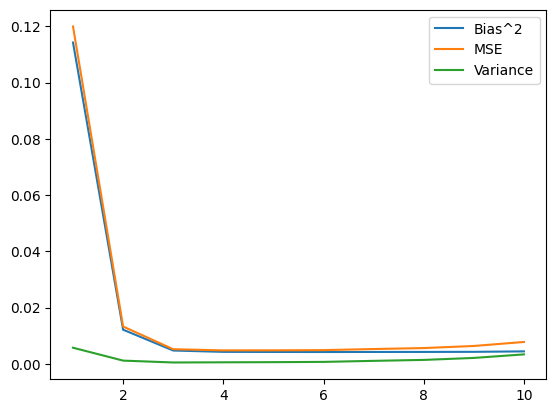

In [40]:
# 2.5
graphDeg = 10
X = []
for i in range(1,graphDeg+1):
    X.append(i)
    
plt.plot(X, bias2Final[:graphDeg], label = "Bias^2")
plt.plot(X, mseArr[:graphDeg], label = "MSE")
plt.plot(X, varFinal[:graphDeg], label = "Variance")
plt.legend()